In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
t_train = pd.read_csv("train.csv")

In [3]:
t_train.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [4]:
t_test = pd.read_csv("test.csv")
t_test.head(10)

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   
7          899       2                  Caldwell, Mr. Albert Francis    male   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9          901       3                       Davies, Mr. John Samuel    male   

    Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
0  34.5      0      0     330911   7.8292   NaN        Q  
1  47.0      1      0     363272   7.0000   NaN        S  
2  62.0      0      0     240276   9.6875   NaN        Q  
3  27.0      0      0     315154   8.6625   NaN        S  
4  22.0      1      1    3101298  12.2875   NaN        S  
5  14.0      0      0       7538   9.2250   NaN        S  
6  30.0      0      0     330972   7.6292   NaN        Q  
7  26.0      1      1     248738  29.0000   NaN        S  
8  18.0      0      0       2657   7.2292   NaN        C  
9  21.0      2      0  A/4 48871  24.1500   NaN        S

In [5]:
t_train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

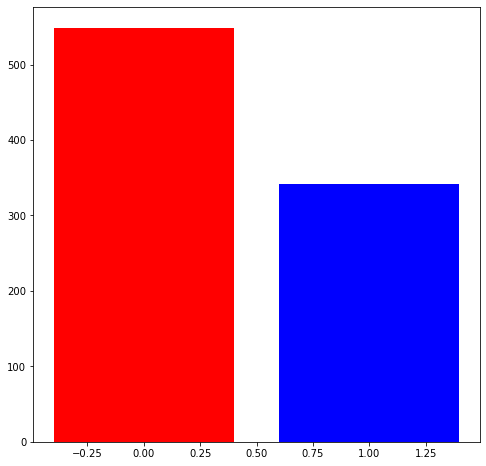

In [6]:
plt.figure(figsize=(8,8))
plt.bar(list(t_train['Survived'].value_counts().keys()),list(t_train['Survived'].value_counts()),color=["r","Blue"])
plt.show()

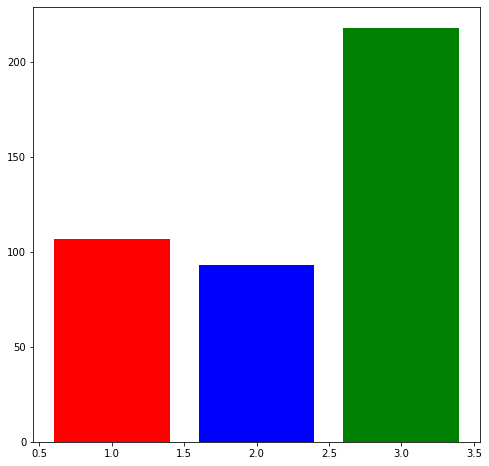

In [7]:
plt.figure(figsize=(8,8))
plt.bar(list(t_test['Pclass'].value_counts().keys()),list(t_test['Pclass'].value_counts()),color=["green","red","Blue"])
plt.show()

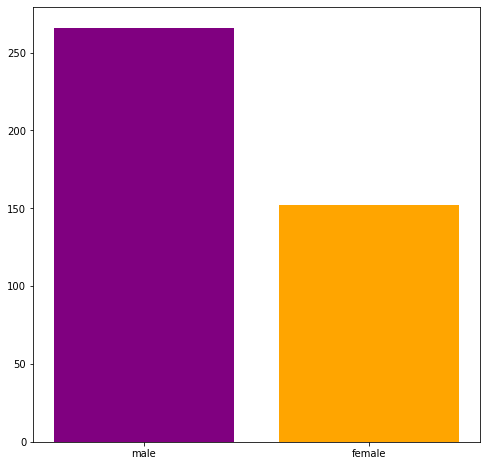

In [8]:
plt.figure(figsize=(8,8))
plt.bar(list(t_test['Sex'].value_counts().keys()),list(t_test['Sex'].value_counts()),color=["purple","orange"])
plt.show()

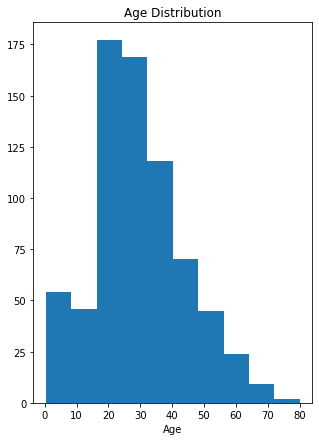

In [9]:
plt.figure(figsize=(5,7))
plt.hist(t_train['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


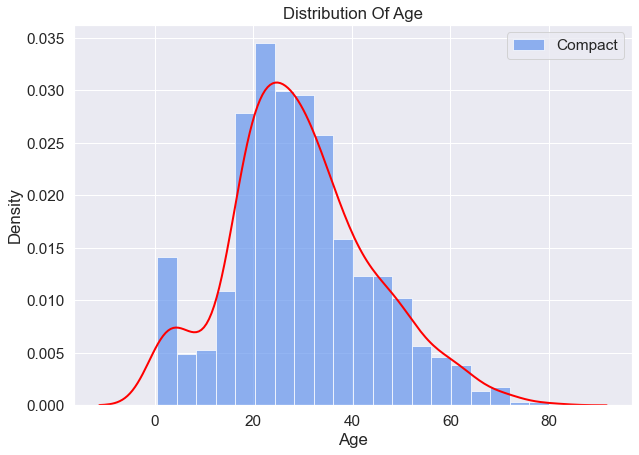

In [10]:
kwargs = dict(hist_kws={'alpha':.7}, kde_kws={'linewidth':2,"color":"red"})
sns.set(font_scale=1.4)
plt.figure(figsize=(10,7))
sns.distplot(t_train['Age'], color="cornflowerblue", label="Compact", **kwargs)
plt.legend();
plt.title('Distribution Of Age')
plt.xlabel('Age')
plt.show()

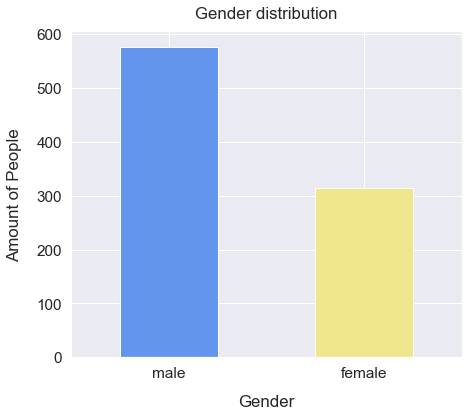

In [11]:
sns.set(font_scale=1.4)
t_train['Sex'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0,color=["cornflowerblue","khaki"])
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Amount of People", labelpad=14)
plt.title("Gender distribution", y=1.02);

In [12]:
x_train = pd.get_dummies(t_train[["Pclass", "Sex", "SibSp", "Parch"]])
y_train = t_train["Survived"]
x_test = pd.get_dummies(t_test[["Pclass", "Sex", "SibSp", "Parch"]])

#creating our model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=1)
classifier.fit(x_train, y_train)

#predicting the results
y_pred = classifier.predict(x_test)

#converting the result into a pandas dataframe having two attributes "PassengerId" and "Survival predictions"
result = pd.DataFrame({'PassengerId': t_test.PassengerId, 'Survived': y_pred})

#converting our result into a csv file
result.to_csv('survival_predictions.csv', index=False)
print("Successfully Submitted !")

Successfully Submitted !


# Age

In [13]:
data = [t_train, t_test]
for dataset in data:
    mean=t_train["Age"].mean()
    std=t_test["Age"].std()
    isnull=dataset["Age"].isnull().sum()
    random_age = np.random.randint(mean - std,mean + std, size = isnull)
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = random_age
    dataset["Age"] = age_slice
    dataset["Age"] = t_train["Age"].astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

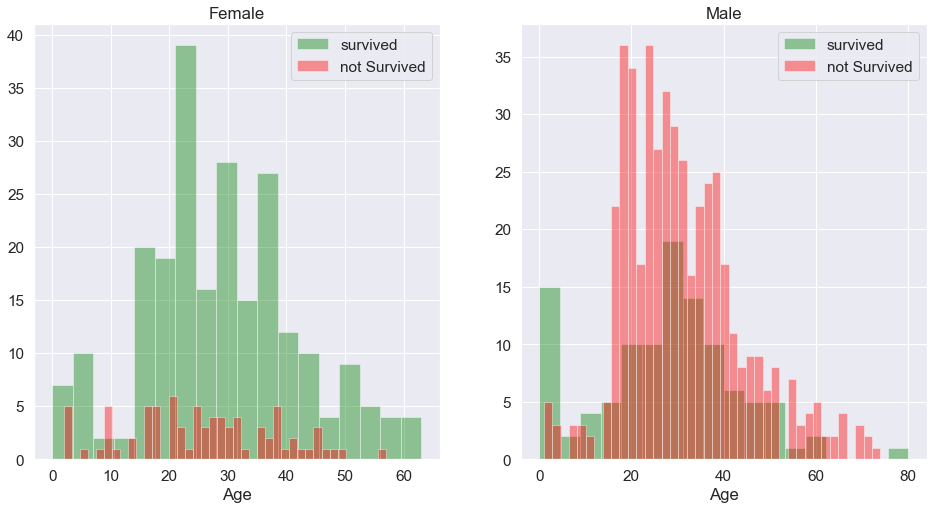

In [14]:
survived = 'survived'
not_survived = 'not Survived'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize= (16,8))
women = t_train[t_train["Sex"] == 'female']
men = t_train[t_train["Sex"] == 'male']

ax = sns.distplot(women[women['Survived'] == 1].Age.dropna(),bins = 18, label = survived, ax = axes[0], kde = False, color="green")
ax = sns.distplot(women[women['Survived'] == 0].Age.dropna(),bins = 40, label = not_survived, ax = axes[0], kde = False, color="red")

ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False, color="green")
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False, color="red")
ax.legend()
_ = ax.set_title('Male');

In [15]:
px.scatter_3d(t_train, x='PassengerId', y = 'Sex', z = 'Age', color = 'Age')
 #3D not shoing in Github File name: 3D.png

In [16]:
df = pd.read_csv("train.csv")
for template in ["plotly"]:
    fig = px.scatter(df,
                     x="PassengerId", y="Age", color="Survived",
                     log_x=True, size_max=20,
                     template=template, title="Which Age Survived?")
    fig.show()

# Relatives

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



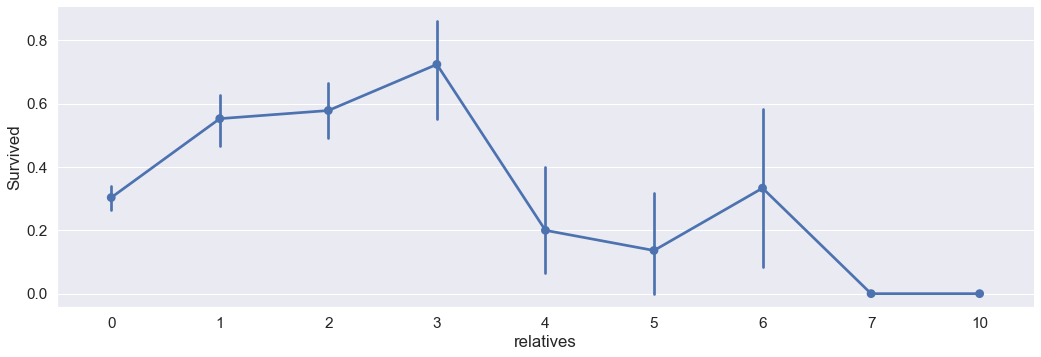

In [17]:
data = [t_train, t_test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'travelled_alone'] = 'No'
    dataset.loc[dataset['relatives'] ==0, 'travelled_alone'] ='Yes'
axes = sns.factorplot('relatives','Survived', data = t_train, aspect = 2.9,);

In [18]:
t_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex  Age  SibSp  \
0                              Braund, Mr. Owen Harris    male   22      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                               Heikkinen, Miss. Laina  female   26      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                             Allen, Mr. William Henry    male   35      0   
..                                                 ...     ...  ...    ...   
886                              Montvila, Rev. Juozas    male   27      0   
887                       Graham, Miss. Margaret Edith  female   19      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   28      1   
889                              Behr, Mr. Karl Howell    male   26      0   
890                                Dooley, Mr. Patrick    male   32      0   

     Parch            Ticket     Fare Cabin Embarked  relatives  \
0        0         A/5 21171   7.2500   NaN        S          1   
1        0          PC 17599  71.2833   C85        C          1   
2        0  STON/O2. 3101282   7.9250   NaN        S          0   
3        0            113803  53.1000  C123        S          1   
4        0            373450   8.0500   NaN        S          0   
..     ...               ...      ...   ...      ...        ...   
886      0            211536  13.0000   NaN        S          0   
887      0            112053  30.0000   B42        S          0   
888      2        W./C. 6607  23.4500   NaN        S          3   
889      0            111369  30.0000  C148        C          0   
890      0            370376   7.7500   NaN        Q          0   

    travelled_alone  
0                No  
1                No  
2               Yes  
3                No  
4               Yes  
..              ...  
886             Yes  
887             Yes  
888              No  
889             Yes  
890             Yes  

[891 rows x 14 columns]

In [19]:
fig = px.histogram(t_train, x="SibSp", y = "Parch", color = "Sex", marginal = "rug", hover_data = t_train.columns)
fig.show()

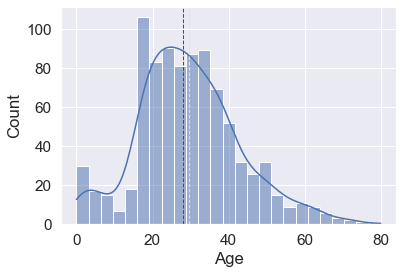

Mean:  29.516273849607185
Median:  28.0


In [22]:
sns.histplot(t_train.Age,kde=4)
plt.axvline(t_train.Age.mean(), color='Yellow', linestyle='dashed', linewidth=1)
plt.axvline(t_train.Age.median(), color='red', linestyle='dashed', linewidth=1)
plt.show()
print("Mean: ",t_train.Age.mean())
print("Median: ",t_train.Age.median())

In [23]:
t_train.Age = t_train.Age.fillna(t_train.Age.median())

In [24]:
t_train.Embarked = t_train.Embarked.fillna(method='ffill')

In [25]:
print((t_train.isnull().sum()/len(t_train)*100).sort_values(ascending=False))

Cabin              77.104377
PassengerId         0.000000
Survived            0.000000
Pclass              0.000000
Name                0.000000
Sex                 0.000000
Age                 0.000000
SibSp               0.000000
Parch               0.000000
Ticket              0.000000
Fare                0.000000
Embarked            0.000000
relatives           0.000000
travelled_alone     0.000000
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



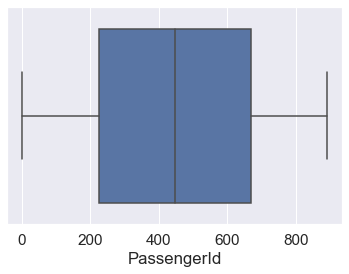

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



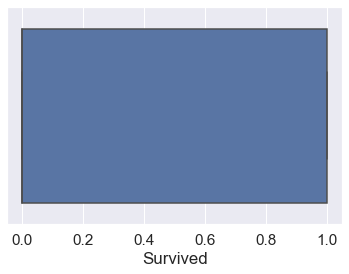

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



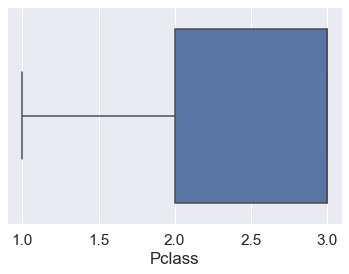

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



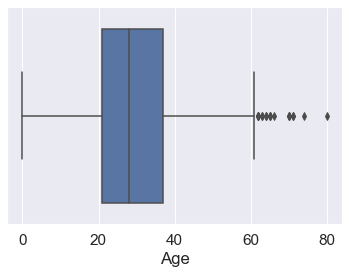

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



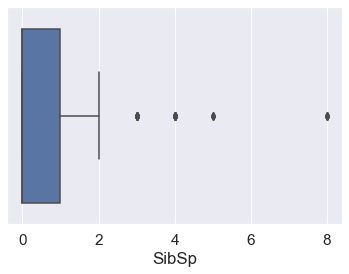

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



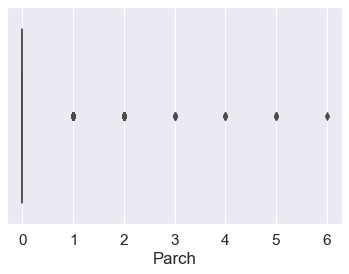

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



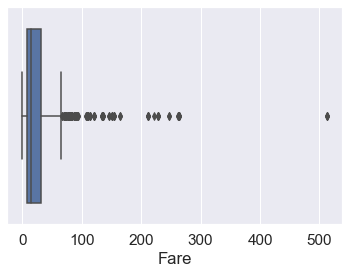

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



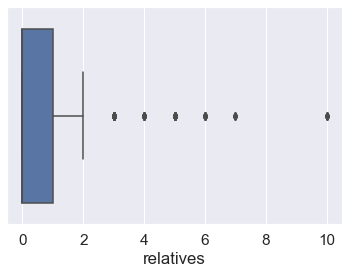

In [26]:
for i in t_train.select_dtypes(include = 'number'):
    sns.boxplot(t_train[i])
    plt.show() 

In [27]:
t_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'relatives',
       'travelled_alone'],
      dtype='object')

In [28]:
t_train.Survived.value_counts(1)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Survived', ylabel='count'>

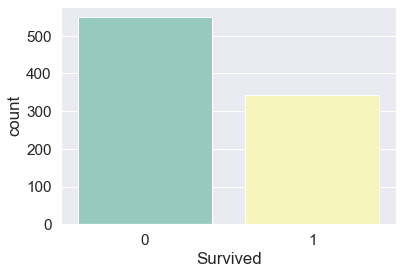

In [29]:
sns.countplot(t_train.Survived,palette="Set3")

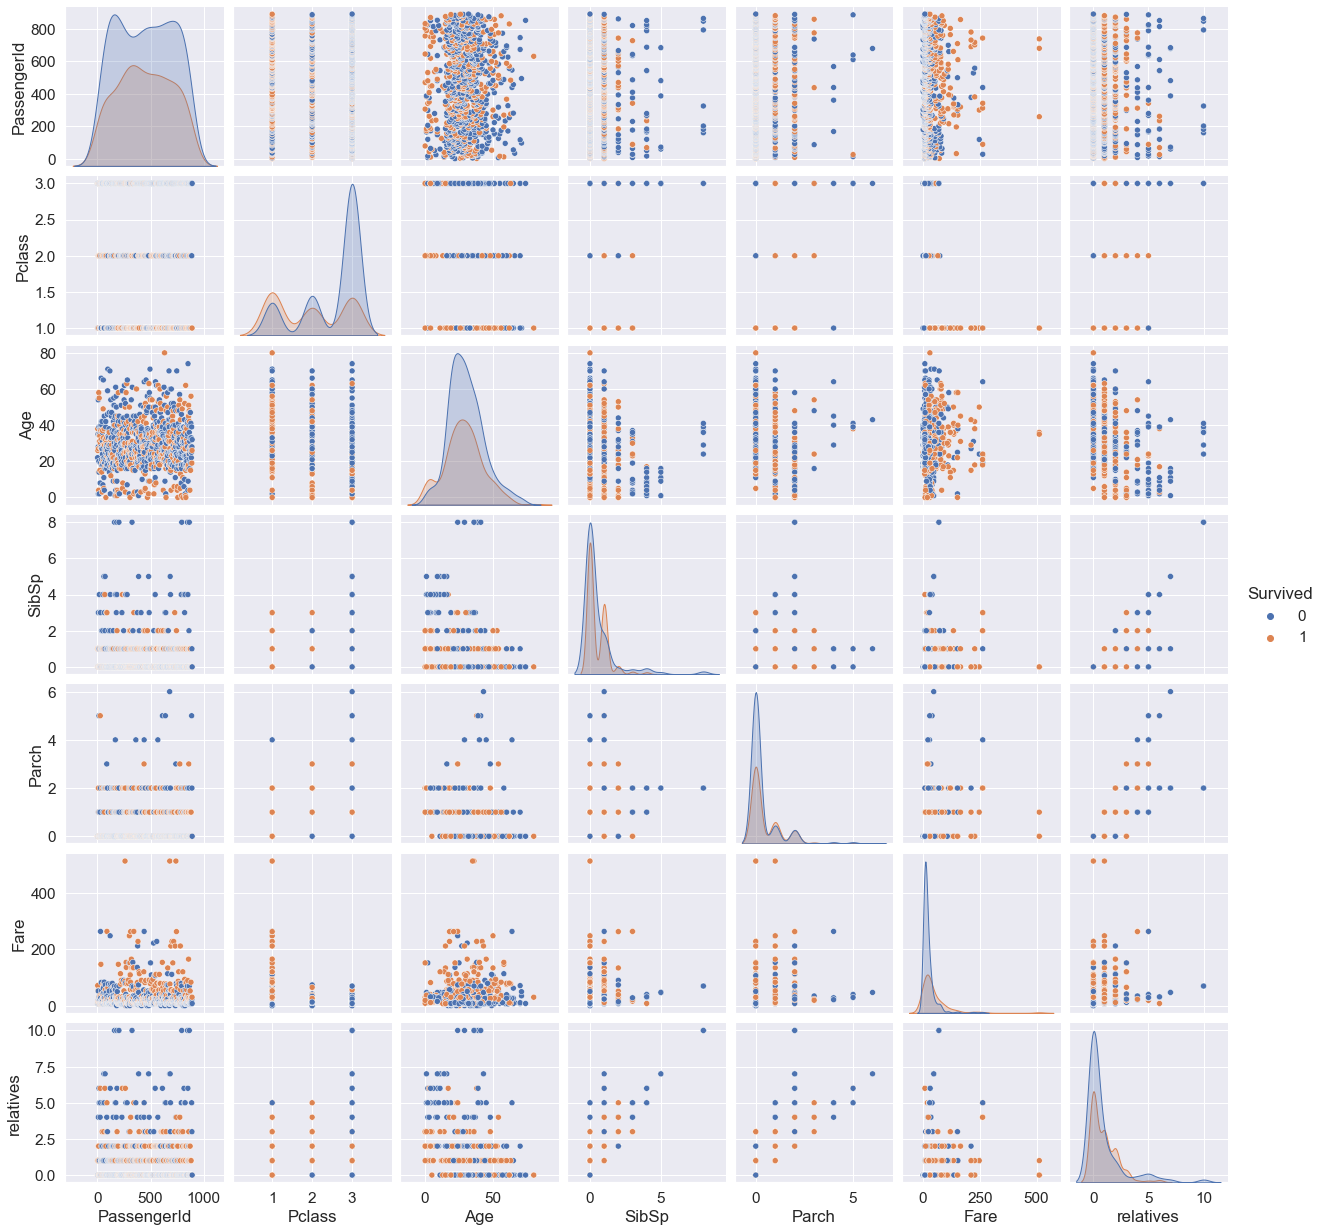

In [30]:
sns.pairplot(data=t_train,hue='Survived')

<AxesSubplot:>

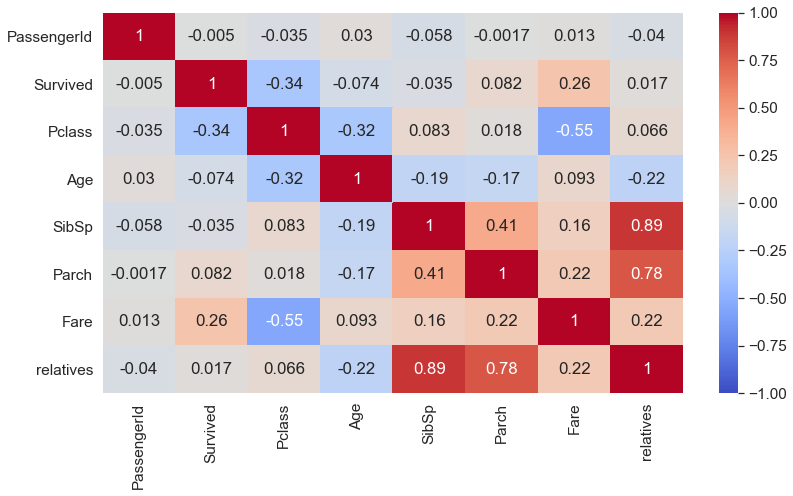

In [31]:
plt.figure(figsize=(13,7))
sns.heatmap(t_train.corr(),cmap='coolwarm',vmax=1,vmin=-1,annot=True)

In [39]:
import sklearn
from sklearn.preprocessing import LabelEncoder,StandardScaler 

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [43]:
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split,GridSearchCV

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from xgboost import XGBClassifier

In [33]:
df_train = t_train

In [34]:
lr = LabelEncoder()
df_train['Sex']= lr.fit_transform(df_train['Sex'])
df_train['Cabin']= lr.fit_transform(df_train['Cabin'])
df_train['Embarked']= lr.fit_transform(df_train['Embarked'])

In [35]:
X = df_train.drop(['PassengerId','Name','Ticket','Survived'],axis=1)
y = df_train.Survived

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)